# Scaling and Normalizing Tanks Dataset before Linear Regression

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ab
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [2]:
#racalling the csv file
df = pd.read_csv("e:/tanksdataset9parameters.csv")
df

,tank name,H/D,H,D,HL,HL/H (%full),t,max pga(abs value),magnitude,mesh edge size,actual max uplift
0,TANKA01,1.184211,4.5,3.8,4.2,0.933333,0.006,3.05900,6.19,0.2,0.045620
1,TANKA02,1.184211,4.5,3.8,4.2,0.933333,0.006,5.78550,6.69,0.2,0.058750
2,TANKA03,1.184211,4.5,3.8,4.2,0.933333,0.006,3.41200,6.90,0.2,0.045015
3,TANKA04,1.184211,4.5,3.8,4.2,0.933333,0.006,12.13980,6.61,0.2,0.057487
4,TANKA05,1.184211,4.5,3.8,4.2,0.933333,0.006,6.32480,6.93,0.2,0.025031
...,...,...,...,...,...,...,...,...,...,...,...
355,TANKD86,2.000000,20.0,10.0,10.0,0.500000,0.021,0.43100,6.19,1.0,0.010545
356,TANKD87,2.000000,20.0,10.0,10.0,0.500000,0.021,1.55900,6.69,1.0,0.010576
357,TANKD88,2.000000,20.0,10.0,10.0,0.500000,0.021,2.09840,6.90,1.0,0.010758
358,TANKD89,2.000000,20.0,10.0,10.0,0.500000,0.021,1.48070,6.61,1.0,0.010547


In [3]:
df.describe()

,H/D,H,D,HL,HL/H (%full),t,max pga(abs value),magnitude,mesh edge size,actual max uplift
count,360.000000,360.000000,360.000000,360.00000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,1.146053,16.625000,18.450000,11.67500,0.704861,0.013000,3.795722,6.664000,0.800000,0.041383
std,0.572768,9.482703,11.772531,7.32057,0.170007,0.005424,3.317691,0.266724,0.346892,0.048906
min,0.400000,4.500000,3.800000,2.20000,0.488889,0.006000,0.431000,6.190000,0.200000,0.003007
25%,0.850000,10.125000,8.450000,5.55000,0.500000,0.008000,1.559000,6.610000,0.800000,0.009359
50%,1.092105,16.000000,20.000000,10.50000,0.704167,0.012500,2.578700,6.690000,1.000000,0.018393
75%,1.388158,22.500000,30.000000,15.75000,0.900000,0.018000,5.785500,6.900000,1.000000,0.057454
max,2.000000,30.000000,30.000000,27.00000,0.933333,0.021000,12.139800,6.930000,1.000000,0.289944


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tank name           360 non-null    object 
 1   H/D                 360 non-null    float64
 2   H                   360 non-null    float64
 3   D                   360 non-null    float64
 4   HL                  360 non-null    float64
 5   HL/H (%full)        360 non-null    float64
 6   t                   360 non-null    float64
 7   max pga(abs value)  360 non-null    float64
 8   magnitude           360 non-null    float64
 9   mesh edge size      360 non-null    float64
 10  actual max uplift   360 non-null    float64
dtypes: float64(10), object(1)
memory usage: 31.1+ KB


In [5]:
corr_matrix =df.corr()
corr_matrix["actual max uplift"].sort_values(ascending =False)

actual max uplift     1.000000
max pga(abs value)    0.434505
HL                    0.367842
mesh edge size        0.318183
H                     0.277341
t                     0.275614
HL/H (%full)          0.262191
H/D                   0.194278
magnitude             0.102490
D                     0.095161
Name: actual max uplift, dtype: float64

In [6]:
newdf = df.rename(columns={'actual max uplift': 'actualmaxuplift', 'max pga(abs value)': 'maxpga_absvalue' , 'mesh edge size': 'meshedgesize','HL/H (%full)': 'HLH','H/D': 'HD',})
newdf

,tank name,HD,H,D,HL,HLH,t,maxpga_absvalue,magnitude,meshedgesize,actualmaxuplift
0,TANKA01,1.184211,4.5,3.8,4.2,0.933333,0.006,3.05900,6.19,0.2,0.045620
1,TANKA02,1.184211,4.5,3.8,4.2,0.933333,0.006,5.78550,6.69,0.2,0.058750
2,TANKA03,1.184211,4.5,3.8,4.2,0.933333,0.006,3.41200,6.90,0.2,0.045015
3,TANKA04,1.184211,4.5,3.8,4.2,0.933333,0.006,12.13980,6.61,0.2,0.057487
4,TANKA05,1.184211,4.5,3.8,4.2,0.933333,0.006,6.32480,6.93,0.2,0.025031
...,...,...,...,...,...,...,...,...,...,...,...
355,TANKD86,2.000000,20.0,10.0,10.0,0.500000,0.021,0.43100,6.19,1.0,0.010545
356,TANKD87,2.000000,20.0,10.0,10.0,0.500000,0.021,1.55900,6.69,1.0,0.010576
357,TANKD88,2.000000,20.0,10.0,10.0,0.500000,0.021,2.09840,6.90,1.0,0.010758
358,TANKD89,2.000000,20.0,10.0,10.0,0.500000,0.021,1.48070,6.61,1.0,0.010547


In [13]:
newdf

,HD,H,D,HL,HLH,t,maxpga_absvalue,magnitude,meshedgesize,actualmaxuplift
0,1.184211,4.5,3.8,4.2,0.933333,0.006,3.05900,6.19,0.2,0.045620
1,1.184211,4.5,3.8,4.2,0.933333,0.006,5.78550,6.69,0.2,0.058750
2,1.184211,4.5,3.8,4.2,0.933333,0.006,3.41200,6.90,0.2,0.045015
3,1.184211,4.5,3.8,4.2,0.933333,0.006,12.13980,6.61,0.2,0.057487
4,1.184211,4.5,3.8,4.2,0.933333,0.006,6.32480,6.93,0.2,0.025031
...,...,...,...,...,...,...,...,...,...,...
355,2.000000,20.0,10.0,10.0,0.500000,0.021,0.43100,6.19,1.0,0.010545
356,2.000000,20.0,10.0,10.0,0.500000,0.021,1.55900,6.69,1.0,0.010576
357,2.000000,20.0,10.0,10.0,0.500000,0.021,2.09840,6.90,1.0,0.010758
358,2.000000,20.0,10.0,10.0,0.500000,0.021,1.48070,6.61,1.0,0.010547


In [25]:
# scale
scaled_newdf=scale(newdf)
scaled_newdf

array([[ 0.06671287, -1.28042346, -1.2461543 , ..., -1.77959225,
        -1.73205081,  0.08676686],
       [ 0.06671287, -1.28042346, -1.2461543 , ...,  0.09761476,
        -1.73205081,  0.35560837],
       [ 0.06671287, -1.28042346, -1.2461543 , ...,  0.88604171,
        -1.73205081,  0.07437898],
       ...,
       [ 1.49298797,  0.35640653, -0.71877159, ...,  0.88604171,
         0.57735027, -0.62707792],
       [ 1.49298797,  0.35640653, -0.71877159, ..., -0.20273836,
         0.57735027, -0.63138808],
       [ 1.49298797,  0.35640653, -0.71877159, ...,  0.99867413,
         0.57735027, -0.62995477]])

In [15]:
df_scaled_newdf = pd.DataFrame(scaled_newdf,index=newdf.index,columns=newdf.columns)
df_scaled_newdf

,HD,H,D,HL,HLH,t,maxpga_absvalue,magnitude,meshedgesize,actualmaxuplift
0,0.066713,-1.280423,-1.246154,-1.022517,1.345767,-1.292461,-0.222368,-1.779592,-1.732051,0.086767
1,0.066713,-1.280423,-1.246154,-1.022517,1.345767,-1.292461,0.600583,0.097615,-1.732051,0.355608
2,0.066713,-1.280423,-1.246154,-1.022517,1.345767,-1.292461,-0.115820,0.886042,-1.732051,0.074379
3,0.066713,-1.280423,-1.246154,-1.022517,1.345767,-1.292461,2.518526,-0.202738,-1.732051,0.329756
4,0.066713,-1.280423,-1.246154,-1.022517,1.345767,-1.292461,0.763362,0.998674,-1.732051,-0.334810
...,...,...,...,...,...,...,...,...,...,...
355,1.492988,0.356407,-0.718772,-0.229126,-1.206691,1.477098,-1.015587,-1.779592,0.577350,-0.631429
356,1.492988,0.356407,-0.718772,-0.229126,-1.206691,1.477098,-0.675119,0.097615,0.577350,-0.630794
357,1.492988,0.356407,-0.718772,-0.229126,-1.206691,1.477098,-0.512309,0.886042,0.577350,-0.627078
358,1.492988,0.356407,-0.718772,-0.229126,-1.206691,1.477098,-0.698752,-0.202738,0.577350,-0.631388


In [16]:
scaled_corr_matrix =df_scaled_newdf.corr()
scaled_corr_matrix["actualmaxuplift"].sort_values(ascending =False)

actualmaxuplift    1.000000
maxpga_absvalue    0.434505
HL                 0.367842
meshedgesize       0.318183
H                  0.277341
t                  0.275614
HLH                0.262191
HD                 0.194278
magnitude          0.102490
D                  0.095161
Name: actualmaxuplift, dtype: float64

In [17]:
df_scaled_newdf.describe()

,HD,H,D,HL,HLH,t,maxpga_absvalue,magnitude,meshedgesize,actualmaxuplift
count,3.600000e+02,3.600000e+02,3.600000e+02,3.600000e+02,3.600000e+02,3.600000e+02,3.600000e+02,3.600000e+02,3.600000e+02,3.600000e+02
mean,-4.070818e-17,-2.544261e-16,8.709083e-16,1.062422e-16,2.282125e-16,2.097088e-17,9.035982e-17,1.954301e-15,-1.842353e-15,-2.106340e-16
std,1.001392e+00,1.001392e+00,1.001392e+00,1.001392e+00,1.001392e+00,1.001392e+00,1.001392e+00,1.001392e+00,1.001392e+00,1.001392e+00
min,-1.304352e+00,-1.280423e+00,-1.246154e+00,-1.296100e+00,-1.272139e+00,-1.292461e+00,-1.015587e+00,-1.779592e+00,-1.732051e+00,-7.857715e-01
25%,-5.175998e-01,-6.864126e-01,-8.506173e-01,-8.378480e-01,-1.206691e+00,-9.231862e-01,-6.751187e-01,-2.027384e-01,-2.220446e-16,-6.557252e-01
50%,-9.431819e-02,-6.600121e-02,1.318457e-01,-1.607300e-01,-4.090479e-03,-9.231862e-02,-3.673386e-01,9.761476e-02,5.773503e-01,-4.707347e-01
75%,4.232816e-01,6.204114e-01,9.824629e-01,5.574254e-01,1.149424e+00,9.231862e-01,6.005826e-01,8.860417e-01,5.773503e-01,3.290615e-01
max,1.492988e+00,1.412426e+00,9.824629e-01,2.096330e+00,1.345767e+00,1.477098e+00,2.518526e+00,9.986741e-01,5.773503e-01,5.089495e+00


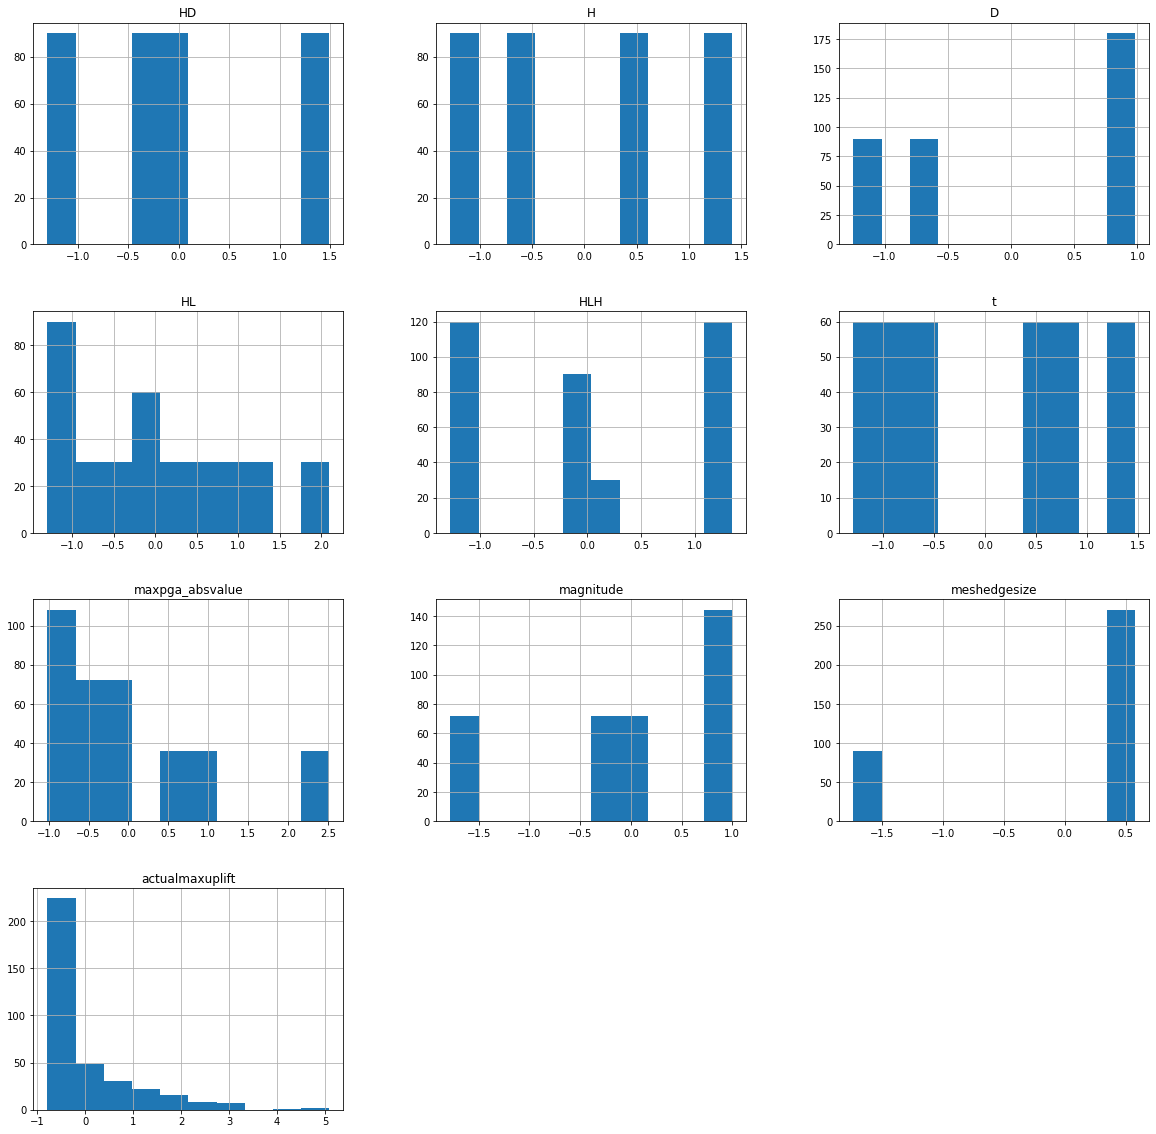

In [18]:
df_scaled_newdf.hist(figsize=(20,20))
plt.show()

In [20]:
msk = np.random.rand(len(df_scaled_newdf)) < 0.8
train = df_scaled_newdf[msk]
test = df_scaled_newdf[~msk]

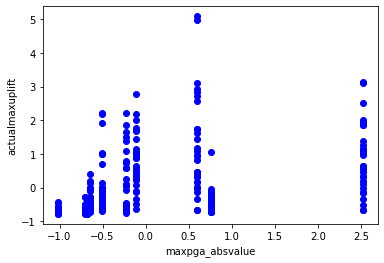

In [21]:
plt.scatter(train.maxpga_absvalue, train.actualmaxuplift,  color='blue')
plt.xlabel("maxpga_absvalue")
plt.ylabel("actualmaxuplift")
plt.show()

In [22]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['maxpga_absvalue']])
train_y = np.asanyarray(train[['actualmaxuplift']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.42187324]]
Intercept:  [0.01548044]


Text(0, 0.5, 'actualmaxuplift')

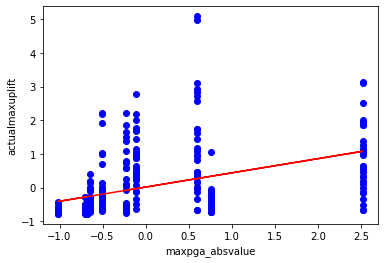

In [23]:
plt.scatter(train.maxpga_absvalue, train.actualmaxuplift,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("maxpga_absvalue")
plt.ylabel("actualmaxuplift")

In [24]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['maxpga_absvalue']])
test_y = np.asanyarray(test[['actualmaxuplift']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 0.57
Residual sum of squares (MSE): 0.72
R2-score: 0.25


In [26]:
# normalization
from sklearn.preprocessing import normalize

In [27]:
newdf

,HD,H,D,HL,HLH,t,maxpga_absvalue,magnitude,meshedgesize,actualmaxuplift
0,1.184211,4.5,3.8,4.2,0.933333,0.006,3.05900,6.19,0.2,0.045620
1,1.184211,4.5,3.8,4.2,0.933333,0.006,5.78550,6.69,0.2,0.058750
2,1.184211,4.5,3.8,4.2,0.933333,0.006,3.41200,6.90,0.2,0.045015
3,1.184211,4.5,3.8,4.2,0.933333,0.006,12.13980,6.61,0.2,0.057487
4,1.184211,4.5,3.8,4.2,0.933333,0.006,6.32480,6.93,0.2,0.025031
...,...,...,...,...,...,...,...,...,...,...
355,2.000000,20.0,10.0,10.0,0.500000,0.021,0.43100,6.19,1.0,0.010545
356,2.000000,20.0,10.0,10.0,0.500000,0.021,1.55900,6.69,1.0,0.010576
357,2.000000,20.0,10.0,10.0,0.500000,0.021,2.09840,6.90,1.0,0.010758
358,2.000000,20.0,10.0,10.0,0.500000,0.021,1.48070,6.61,1.0,0.010547


In [33]:
# l2 is Euclidean method for normalizing(The L2 norm calculates the distance of the vector coordinate
# from the origin of the vector space. As such, it is also known as the Euclidean norm as it is calculated
# as the Euclidean distance from the origin. The result is a positive distance value.)
normalized_newdf_l2=normalize(newdf,norm="l2",axis=0)
normalized_newdf_l2

array([[0.04872791, 0.01239606, 0.00915464, ..., 0.04891677, 0.01209127,
        0.03756106],
       [0.04872791, 0.01239606, 0.00915464, ..., 0.05286805, 0.01209127,
        0.04837125],
       [0.04872791, 0.01239606, 0.00915464, ..., 0.05452758, 0.01209127,
        0.03706294],
       ...,
       [0.08229603, 0.0550936 , 0.02409117, ..., 0.05452758, 0.06045635,
        0.00885715],
       [0.08229603, 0.0550936 , 0.02409117, ..., 0.05223584, 0.06045635,
        0.00868384],
       [0.08229603, 0.0550936 , 0.02409117, ..., 0.05476466, 0.06045635,
        0.00874147]])

In [34]:
df_normalized_newdf_l2 = pd.DataFrame(normalized_newdf_l2,index=newdf.index,columns=newdf.columns)
df_normalized_newdf_l2

,HD,H,D,HL,HLH,t,maxpga_absvalue,magnitude,meshedgesize,actualmaxuplift
0,0.048728,0.012396,0.009155,0.016070,0.067848,0.022454,0.032000,0.048917,0.012091,0.037561
1,0.048728,0.012396,0.009155,0.016070,0.067848,0.022454,0.060521,0.052868,0.012091,0.048371
2,0.048728,0.012396,0.009155,0.016070,0.067848,0.022454,0.035693,0.054528,0.012091,0.037063
3,0.048728,0.012396,0.009155,0.016070,0.067848,0.022454,0.126993,0.052236,0.012091,0.047332
4,0.048728,0.012396,0.009155,0.016070,0.067848,0.022454,0.066163,0.054765,0.012091,0.020609
...,...,...,...,...,...,...,...,...,...,...
355,0.082296,0.055094,0.024091,0.038261,0.036347,0.078591,0.004509,0.048917,0.060456,0.008682
356,0.082296,0.055094,0.024091,0.038261,0.036347,0.078591,0.016309,0.052868,0.060456,0.008708
357,0.082296,0.055094,0.024091,0.038261,0.036347,0.078591,0.021951,0.054528,0.060456,0.008857
358,0.082296,0.055094,0.024091,0.038261,0.036347,0.078591,0.015489,0.052236,0.060456,0.008684


In [31]:
# l1 is manhattan method for normalizing(L1 normalization, also known as Manhattan normalization, 
# scales each row of the input matrix to have a sum of absolute values equal to 1. This type of 
# normalization is useful when the data has a sparse distribution, as it does not amplify the 
# contribution of outliers.)
normalized_newdf_l1=normalize(newdf,norm="l1",axis=0)
normalized_newdf_l1

array([[0.00287026, 0.00075188, 0.00057212, ..., 0.0025802 , 0.00069444,
        0.00306222],
       [0.00287026, 0.00075188, 0.00057212, ..., 0.00278862, 0.00069444,
        0.00394353],
       [0.00287026, 0.00075188, 0.00057212, ..., 0.00287615, 0.00069444,
        0.00302161],
       ...,
       [0.00484756, 0.00334169, 0.00150557, ..., 0.00287615, 0.00347222,
        0.00072209],
       [0.00484756, 0.00334169, 0.00150557, ..., 0.00275527, 0.00347222,
        0.00070796],
       [0.00484756, 0.00334169, 0.00150557, ..., 0.00288866, 0.00347222,
        0.00071266]])

In [32]:
df_normalized_newdf_l1 = pd.DataFrame(normalized_newdf_l1,index=newdf.index,columns=newdf.columns)
df_normalized_newdf_l1

,HD,H,D,HL,HLH,t,maxpga_absvalue,magnitude,meshedgesize,actualmaxuplift
0,0.002870,0.000752,0.000572,0.000999,0.003678,0.001282,0.002239,0.002580,0.000694,0.003062
1,0.002870,0.000752,0.000572,0.000999,0.003678,0.001282,0.004234,0.002789,0.000694,0.003944
2,0.002870,0.000752,0.000572,0.000999,0.003678,0.001282,0.002497,0.002876,0.000694,0.003022
3,0.002870,0.000752,0.000572,0.000999,0.003678,0.001282,0.008884,0.002755,0.000694,0.003859
4,0.002870,0.000752,0.000572,0.000999,0.003678,0.001282,0.004629,0.002889,0.000694,0.001680
...,...,...,...,...,...,...,...,...,...,...
355,0.004848,0.003342,0.001506,0.002379,0.001970,0.004487,0.000315,0.002580,0.003472,0.000708
356,0.004848,0.003342,0.001506,0.002379,0.001970,0.004487,0.001141,0.002789,0.003472,0.000710
357,0.004848,0.003342,0.001506,0.002379,0.001970,0.004487,0.001536,0.002876,0.003472,0.000722
358,0.004848,0.003342,0.001506,0.002379,0.001970,0.004487,0.001084,0.002755,0.003472,0.000708


In [35]:
# min max scale(between 0 and 1)
from sklearn.preprocessing import minmax_scale

In [36]:
minmax_newdf=minmax_scale(newdf,feature_range=(0,1))
minmax_newdf

array([[0.49013158, 0.        , 0.        , ..., 0.        , 0.        ,
        0.14851043],
       [0.49013158, 0.        , 0.        , ..., 0.67567568, 0.        ,
        0.1942686 ],
       [0.49013158, 0.        , 0.        , ..., 0.95945946, 0.        ,
        0.14640195],
       ...,
       [1.        , 0.60784314, 0.23664122, ..., 0.95945946, 1.        ,
        0.02701045],
       [1.        , 0.60784314, 0.23664122, ..., 0.56756757, 1.        ,
        0.02627684],
       [1.        , 0.60784314, 0.23664122, ..., 1.        , 1.        ,
        0.0265208 ]])

In [37]:
df_minmax_newdf=pd.DataFrame(minmax_newdf,index=newdf.index,columns=newdf.columns)
df_minmax_newdf

,HD,H,D,HL,HLH,t,maxpga_absvalue,magnitude,meshedgesize,actualmaxuplift
0,0.490132,0.000000,0.000000,0.080645,1.000,0.0,0.224447,0.000000,0.0,0.148510
1,0.490132,0.000000,0.000000,0.080645,1.000,0.0,0.457306,0.675676,0.0,0.194269
2,0.490132,0.000000,0.000000,0.080645,1.000,0.0,0.254595,0.959459,0.0,0.146402
3,0.490132,0.000000,0.000000,0.080645,1.000,0.0,1.000000,0.567568,0.0,0.189868
4,0.490132,0.000000,0.000000,0.080645,1.000,0.0,0.503365,1.000000,0.0,0.076756
...,...,...,...,...,...,...,...,...,...,...
355,1.000000,0.607843,0.236641,0.314516,0.025,1.0,0.000000,0.000000,1.0,0.026270
356,1.000000,0.607843,0.236641,0.314516,0.025,1.0,0.096338,0.675676,1.0,0.026378
357,1.000000,0.607843,0.236641,0.314516,0.025,1.0,0.142406,0.959459,1.0,0.027010
358,1.000000,0.607843,0.236641,0.314516,0.025,1.0,0.089651,0.567568,1.0,0.026277


In [40]:
# exportnig to excel
df_minmax_newdf.to_excel("e:/df_minmax_newdf.xlsx")